In [72]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing
import datetime as dt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('../data/processed/movie_stats/movie_stats_clustered.csv')
reviews = pd.read_csv('../data/processed/all_reviews.csv').drop(columns='Unnamed: 0')
df.movie_name = df.movie_name.str.lower()
df.movie_name = df.movie_name.str.replace(' ', '-')
df.movie_name = df.movie_name.str.replace(':', '')
df.movie_name = df.movie_name.str.replace('the-avengers', 'avengers-assemble')
df = df.query('movie_name != "the-marvels"')
reviews2 = reviews.copy()
reviews = reviews.dropna(subset='score')
# df = df.sort_values('movie_name')

/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_49862/1621350978.py:2: DtypeWarning: Columns (5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv('../data/processed/all_reviews.csv').drop(columns='Unnamed: 0')


In [3]:
df.head()

,Unnamed: 0,movie_name,imdb_id,release_date,cast,direction,production_companies,movie_budget,movie_revenue,film_series,film_series_cluster,cast_similarity
1,1,guardians-of-the-galaxy-vol.-3,tt6791350,2023-05-03,"{'Chris Pratt': 'Peter Quill / Star-Lord', 'Zo...",['James Gunn'],"['Marvel Studios', 'Kevin Feige Productions']",250000000,845430302,9,2,0.823059
2,2,spider-man-no-way-home,tt10872600,2021-12-15,"{'Tom Holland': 'Peter Parker / Spider-Man', '...",['Jon Watts'],"['Marvel Studios', 'Pascal Pictures', 'Columbi...",200000000,1921847111,5,7,0.549519
3,3,avengers-infinity-war,tt4154756,2018-04-25,"{'Robert Downey Jr.': 'Tony Stark / Iron Man',...","['Anthony Russo', 'Joe Russo']",['Marvel Studios'],300000000,2052415039,6,1,0.779569
4,4,ant-man-and-the-wasp-quantumania,tt10954600,2023-02-15,"{'Paul Rudd': 'Scott Lang / Ant-Man', 'Evangel...",['Peyton Reed'],"['Marvel Studios', 'Kevin Feige Productions']",200000000,476071180,4,4,0.546267
5,5,black-panther-wakanda-forever,tt9114286,2022-11-09,"{'Letitia Wright': 'Shuri / Black Panther', ""L...",['Ryan Coogler'],['Marvel Studios'],250000000,859102154,3,10,0.257418


In [4]:
for i in set(reviews.movie):
    if i not in set(df.movie_name):
        print(i)
print('-----------')
for i in set(df.movie_name):
    if i not in set(reviews.movie):
        print(i)

the-guardians-of-the-galaxy-holiday-special
shangchi-and-the-legend-of-the-ten-rings
antman-and-the-wasp
antman-and-the-wasp-quantumania
werewolf-by-night
-----------


In [5]:
yes_dict = {str(i) : [] for i in range(len(set(reviews.score))+1)}
yes_dict['mean_score'] = []
yes_dict['median_score'] = []

most_revs = []
for i in df.movie_name:
    df1 = df.query('movie_name == @i')
    df_rev = reviews.query('movie == @i')
    score_list = [[] for i in range(len(set(reviews.score))+1)]
    for j in range(len(score_list)):
        df2 = reviews.query('movie == @i & score == @j')
        score_list[j].append(int(len(df2)) / len(df_rev))
        yes_dict[str(j)].append(score_list[j][0])
    yes_dict['mean_score'].append(np.mean(df_rev.score)/10)
    yes_dict['median_score'].append(np.median(df_rev.score)/10)

In [6]:
for i, j in yes_dict.items():
    df[i] = j
df = df.drop(columns='0')

In [7]:
y = df[['movie_revenue']]
df_pca = df.drop(columns=['Unnamed: 0','film_series',  'film_series_cluster', 'imdb_id', 'cast', 'direction', 'production_companies', 'movie_revenue'])
df_pca = df_pca.set_index('movie_name')

scaler = preprocessing.MinMaxScaler()

In [8]:
df_pca['release_date']  = pd.to_datetime(df_pca['release_date'])

In [9]:
df_pca['release_date']  = (df_pca['release_date'] - dt.datetime(1970,1,1)).dt.total_seconds()

df_pca['release_date']  = scaler.fit_transform(np.array(df_pca['release_date']).reshape(-1,1))
df_pca['movie_budget']  = scaler.fit_transform(np.array(df_pca['movie_budget']).reshape(-1,1))



In [10]:
var_list = []
for i in range(1 , len(df_pca.columns) + 1):
    # print(i)
    pca = PCA(n_components=i)
    pca.fit_transform(df_pca)
    # print(pca.get_feature_names_out())
    var_list.append(pca.explained_variance_ratio_.cumsum())

In [11]:
df_after_pca = pd.DataFrame(pca.components_, columns= df_pca.columns, index = pca.get_feature_names_out())

<Axes: >

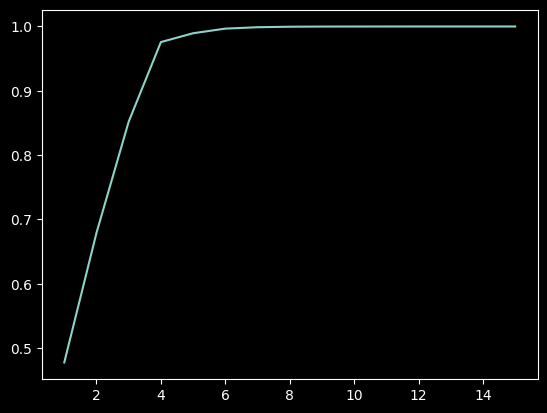

In [12]:
sns.lineplot(x = range(1, 16), y = var_list[-1])

In [13]:
# df_pca.to_parquet('../data/processed/movie_stats/pca_data.parquet')

In [14]:
# reviews.iloc[:150000].to_parquet('../data/processed/reviews1.parquet')
# reviews.iloc[150000:].to_parquet('../data/processed/reviews2.parquet')

In [15]:
def corr_data(reviews, df):
    for i in set(reviews.movie):
        i_df = reviews.query('movie == @i')

In [16]:
df['mean_score'] = df['mean_score'] * 10
df['median_score'] = df['median_score'] * 10

df.drop(columns=['Unnamed: 0']).to_csv('../data/plot_data/graph_data.csv')

In [17]:
df.columns

Index(['Unnamed: 0', 'movie_name', 'imdb_id', 'release_date', 'cast',
       'direction', 'production_companies', 'movie_budget', 'movie_revenue',
       'film_series', 'film_series_cluster', 'cast_similarity', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', 'mean_score', 'median_score'],
      dtype='object')

In [18]:
df.head()

,Unnamed: 0,movie_name,imdb_id,release_date,cast,direction,production_companies,movie_budget,movie_revenue,film_series,...,3,4,5,6,7,8,9,10,mean_score,median_score
1,1,guardians-of-the-galaxy-vol.-3,tt6791350,2023-05-03,"{'Chris Pratt': 'Peter Quill / Star-Lord', 'Zo...",['James Gunn'],"['Marvel Studios', 'Kevin Feige Productions']",250000000,845430302,9,...,0.013507,0.027099,0.019012,0.044563,0.047402,0.115709,0.120699,0.559446,8.526411,10.0
2,2,spider-man-no-way-home,tt10872600,2021-12-15,"{'Tom Holland': 'Peter Parker / Spider-Man', '...",['Jon Watts'],"['Marvel Studios', 'Pascal Pictures', 'Columbi...",200000000,1921847111,5,...,0.018690,0.023940,0.029819,0.051134,0.061634,0.091243,0.129252,0.539059,8.396367,10.0
3,3,avengers-infinity-war,tt4154756,2018-04-25,"{'Robert Downey Jr.': 'Tony Stark / Iron Man',...","['Anthony Russo', 'Joe Russo']",['Marvel Studios'],300000000,2052415039,6,...,0.015914,0.019612,0.028690,0.037431,0.054354,0.105906,0.177743,0.500616,8.404236,10.0
4,4,ant-man-and-the-wasp-quantumania,tt10954600,2023-02-15,"{'Paul Rudd': 'Scott Lang / Ant-Man', 'Evangel...",['Peyton Reed'],"['Marvel Studios', 'Kevin Feige Productions']",200000000,476071180,4,...,0.039254,0.062970,0.051848,0.095518,0.104841,0.172064,0.077527,0.278705,6.961400,8.0
5,5,black-panther-wakanda-forever,tt9114286,2022-11-09,"{'Letitia Wright': 'Shuri / Black Panther', ""L...",['Ryan Coogler'],['Marvel Studios'],250000000,859102154,3,...,0.026659,0.044026,0.037687,0.062956,0.050538,0.087444,0.074071,0.520754,7.884856,10.0


In [19]:
round(stats.linregress(df['10'], df['movie_revenue']).rvalue, 3)

0.499

In [20]:
round(stats.linregress(df['mean_score'], df['movie_revenue']).rvalue, 3)

0.279

In [21]:
reviews2.query('source == "rt_crit"')

,index,date,user,score,title,text,url,movie,scrape_date,is_rotten,source,scrape date
356176,0,2023-09-07,Jeffrey Peterson,NaN,NaN,Ant-Man and the Wasp: Quantumania is a film th...,https://www.rottentomatoes.com/m/ant_man_and_t...,ant-man-and-the-wasp-quantumania,2023-10-21,0.0,rt_crit,2023-10-20
356177,1,2023-08-23,Lee Zumpe,NaN,NaN,It may feel like the director ordered a truckl...,https://www.rottentomatoes.com/m/ant_man_and_t...,ant-man-and-the-wasp-quantumania,2023-10-21,0.0,rt_crit,2023-10-20
356178,2,2023-08-16,Cris Parker,NaN,NaN,While I still like the film overall. Every MCU...,https://www.rottentomatoes.com/m/ant_man_and_t...,ant-man-and-the-wasp-quantumania,2023-10-21,0.0,rt_crit,2023-10-20
356179,3,2023-08-16,Sarah Vincent,NaN,NaN,the two-dimensional supporting characters and ...,https://www.rottentomatoes.com/m/ant_man_and_t...,ant-man-and-the-wasp-quantumania,2023-10-21,1.0,rt_crit,2023-10-20
356180,4,2023-08-09,Rick Bentley,NaN,NaN,The errors are easy to miss because the script...,https://www.rottentomatoes.com/m/ant_man_and_t...,ant-man-and-the-wasp-quantumania,2023-10-21,1.0,rt_crit,2023-10-20
...,...,...,...,...,...,...,...,...,...,...,...,...
369010,12834,2022-09-27,Marisa Mirabal,NaN,NaN,"Utilizing elements of dark comedy, light roman...",https://www.rottentomatoes.com/m/werewolf_by_n...,werewolf-by-night,2023-10-21,0.0,rt_crit,2023-10-20
369011,12835,2022-09-26,Beau Paul,NaN,NaN,The film also reveals itself to be a perfectly...,https://www.rottentomatoes.com/m/werewolf_by_n...,werewolf-by-night,2023-10-21,0.0,rt_crit,2023-10-20
369012,12836,2022-09-26,Alan Cerny,NaN,NaN,I love how (Michael) Giacchino pays homage to ...,https://www.rottentomatoes.com/m/werewolf_by_n...,werewolf-by-night,2023-10-21,0.0,rt_crit,2023-10-20
369013,12837,2022-09-26,Kate Sánchez,NaN,NaN,Werewolf By Night is perfection and there is n...,https://www.rottentomatoes.com/m/werewolf_by_n...,werewolf-by-night,2023-10-21,0.0,rt_crit,2023-10-20


In [22]:
crit_scores = []
for i in df.movie_name:
    df_revs = reviews2.query('source == "rt_crit" & movie == @i')
    print(i, 1 - sum(df_revs['is_rotten'])/len(df_revs))
    crit_scores.append(1 - sum(df_revs['is_rotten'])/len(df_revs))
df['crit_score'] = crit_scores

guardians-of-the-galaxy-vol.-3 0.8170426065162908
spider-man-no-way-home 0.9280742459396751
avengers-infinity-war 0.8516260162601625
ant-man-and-the-wasp-quantumania 0.45721271393643037
black-panther-wakanda-forever 0.8359550561797753
thor-love-and-thunder 0.6292134831460674
avengers-assemble 0.9100817438692098
captain-marvel 0.7902350813743219
doctor-strange-in-the-multiverse-of-madness 0.7358078602620087
avengers-endgame 0.9388489208633094
avengers-age-of-ultron 0.7592592592592593
shang-chi-and-the-legend-of-the-ten-rings 0.9154518950437318
iron-man 0.9357142857142857
captain-america-civil-war 0.9069767441860466
iron-man-2 0.7161716171617162
spider-man-homecoming 0.92
eternals 0.47215496368038745
thor 0.7728813559322034
thor-ragnarok 0.9318181818181819
black-widow 0.7872807017543859
guardians-of-the-galaxy-vol.-2 0.851764705882353
thor-the-dark-world 0.6701388888888888
spider-man-far-from-home 0.9041394335511983
doctor-strange 0.8891752577319587
iron-man-3 0.7945619335347431
black-pa

In [23]:
round(stats.linregress(df['crit_score'], df['movie_revenue']).rvalue, 3)

0.419

In [110]:
linear = {}
exp = {}
pearsons = {}
for i in df.columns:
    try:
        mymodel = np.poly1d(np.polyfit(df[i], df['profit_ratio'], 2))
        linear[i] = round(stats.linregress(df[i], df['profit_ratio']).rvalue, 3)
        linearmodel = np.poly1d(np.polyfit(df[i], df['profit_ratio'], 1))
        exp[i] = round(r2_score(df['profit_ratio'], mymodel(df[i])), 3)
        # print(i,round(stats.linregress(df[i], df['movie_revenue']).rvalue, 3), round(r2_score(df['movie_revenue'], mymodel(df[i])), 3))
        pearson = stats.pearsonr(df[i], df['profit_ratio'])
        pearsons[i] = round(pearson.pvalue, 10)
        print(i, r2_score(linearmodel(df[i]), df['profit_ratio']),  round(pearson.statistic, 3), pearson.pvalue)
    except:
        continue

Unnamed: 0 -16.249529975031283 -0.234 0.19722212034364905
movie_budget -16.953572633353392 0.23 0.2059953954371242
movie_revenue 0.5672716901154233 0.835 2.709670947745737e-09
film_series -8.879396275101003 0.303 0.09164912331850256
film_series_cluster -33.227848116979295 -0.168 0.3566435743622337
cast_similarity -98.05800473910976 -0.1 0.5861741182002528
1 -53.751273841019575 0.134 0.4649178070212442
2 -441.54041794356624 -0.047 0.7963603296495513
3 -213.30747648053273 -0.068 0.7109266565058263
4 -17.041223212134412 -0.229 0.20707132639777265
5 -8.178434019480807 -0.313 0.08065700681205243
6 -3.07483638864994 -0.444 0.010927236770488269
7 -3.222696696785601 -0.438 0.012261164117021094
8 -4.619758700270778 -0.389 0.027919513236842004
9 -15.218783957337575 0.241 0.18395100709665899
10 -3.823581433756824 0.414 0.018375014029753677
mean_score -15.431591400624725 0.24 0.18673293466151647
median_score -5.243517743771886 0.372 0.036274314687183895
crit_score -1.1155788064177705 0.567 0.00072

In [118]:
def rsquare(df, x, y):
    model = LinearRegression()
    model.fit(df[[x]], df[y])
    return model.score(df[[x]], df[y])
def pearson_correlation(df, x, y):
    return f'Pearson:{round(stats.pearsonr(df[x], df[y]).statistic, 3)}', f'Pvalue: {stats.pearsonr(df[x], df[y]).pvalue}'
for i in df.columns:
    try:
        print(i,round(rsquare(df, i, 'movie_revenue'), 3), pearson_correlation(df, i, 'movie_revenue'))
    except:
        print(i, 'error')
        continue

Unnamed: 0 0.175 ('Pearson:-0.418', 'Pvalue: 0.017154444548819602')
movie_name error
imdb_id error
release_date error
cast error
direction error
production_companies error
movie_budget 0.477 ('Pearson:0.69', 'Pvalue: 1.2264720528786353e-05')
movie_revenue 1.0 ('Pearson:1.0', 'Pvalue: 0.0')
film_series 0.112 ('Pearson:0.335', 'Pvalue: 0.06125124938636523')
film_series_cluster 0.128 ('Pearson:-0.358', 'Pvalue: 0.0439971981830454')
cast_similarity 0.027 ('Pearson:-0.165', 'Pvalue: 0.3662485356620292')
1 0.008 ('Pearson:0.091', 'Pvalue: 0.6193893071276795')
2 0.003 ('Pearson:-0.056', 'Pvalue: 0.7589474588123324')
3 0.006 ('Pearson:-0.076', 'Pvalue: 0.677795392159194')
4 0.05 ('Pearson:-0.223', 'Pvalue: 0.22003438559101737')
5 0.083 ('Pearson:-0.289', 'Pvalue: 0.10905897086610133')
6 0.175 ('Pearson:-0.419', 'Pvalue: 0.017118334513600335')
7 0.223 ('Pearson:-0.472', 'Pvalue: 0.006385507249669034')
8 0.255 ('Pearson:-0.505', 'Pvalue: 0.0032009830231238445')
9 0.029 ('Pearson:0.169', 'Pvalue:

In [119]:
def rsquare(df, x, y):
    model = LinearRegression()
    model.fit(df[[x]], df[y])
    return model.score(df[[x]], df[y])
def pearson_correlation(df, x, y):
    return f'Pearson:{round(stats.pearsonr(df[x], df[y]).statistic, 3)}', f'Pvalue: {stats.pearsonr(df[x], df[y]).pvalue}'
for i in df.columns:
    try:
        print(i,round(rsquare(df, i, 'profit_ratio'), 3), pearson_correlation(df, i, 'profit_ratio'))
    except:
        print(i, 'error')
        continue

Unnamed: 0 0.055 ('Pearson:-0.234', 'Pvalue: 0.19722212034364905')
movie_name error
imdb_id error
release_date error
cast error
direction error
production_companies error
movie_budget 0.053 ('Pearson:0.23', 'Pvalue: 0.2059953954371242')
movie_revenue 0.698 ('Pearson:0.835', 'Pvalue: 2.709670947745737e-09')
film_series 0.092 ('Pearson:0.303', 'Pvalue: 0.09164912331850256')
film_series_cluster 0.028 ('Pearson:-0.168', 'Pvalue: 0.3566435743622337')
cast_similarity 0.01 ('Pearson:-0.1', 'Pvalue: 0.5861741182002528')
1 0.018 ('Pearson:0.134', 'Pvalue: 0.4649178070212442')
2 0.002 ('Pearson:-0.047', 'Pvalue: 0.7963603296495513')
3 0.005 ('Pearson:-0.068', 'Pvalue: 0.7109266565058263')
4 0.053 ('Pearson:-0.229', 'Pvalue: 0.20707132639777265')
5 0.098 ('Pearson:-0.313', 'Pvalue: 0.08065700681205243')
6 0.197 ('Pearson:-0.444', 'Pvalue: 0.010927236770488269')
7 0.191 ('Pearson:-0.438', 'Pvalue: 0.012261164117021094')
8 0.151 ('Pearson:-0.389', 'Pvalue: 0.027919513236842004')
9 0.058 ('Pearson:0

In [112]:
df.drop(columns=['Unnamed: 0']).to_csv('../data/plot_data/graph_data.csv')

In [113]:
[i for i in sorted(exp.items(), key = lambda x : x[1])]

[('2', 0.002),
 ('3', 0.01),
 ('1', 0.018),
 ('film_series_cluster', 0.031),
 ('movie_budget', 0.053),
 ('4', 0.071),
 ('var', 0.073),
 ('Unnamed: 0', 0.076),
 ('cast_similarity', 0.109),
 ('mean_score', 0.118),
 ('9', 0.126),
 ('5', 0.146),
 ('median_score', 0.171),
 ('8', 0.174),
 ('score>9', 0.187),
 ('6', 0.2),
 ('7', 0.2),
 ('10', 0.204),
 ('film_series', 0.239),
 ('crit_score', 0.349),
 ('movie_revenue', 0.775),
 ('profit', 0.839),
 ('profit_ratio', 1.0)]

In [114]:
[i for i in sorted(linear.items(), key = lambda x : x[1])]

[('6', -0.444),
 ('7', -0.438),
 ('8', -0.389),
 ('5', -0.313),
 ('Unnamed: 0', -0.234),
 ('4', -0.229),
 ('film_series_cluster', -0.168),
 ('cast_similarity', -0.1),
 ('3', -0.068),
 ('2', -0.047),
 ('1', 0.134),
 ('var', 0.135),
 ('movie_budget', 0.23),
 ('mean_score', 0.24),
 ('9', 0.241),
 ('film_series', 0.303),
 ('median_score', 0.372),
 ('10', 0.414),
 ('score>9', 0.429),
 ('crit_score', 0.567),
 ('movie_revenue', 0.835),
 ('profit', 0.871),
 ('profit_ratio', 1.0)]

In [102]:
[i for i in sorted(pearsons.items(), key = lambda x : x[1])]

[('profit_ratio', 0.0),
 ('profit', 1e-10),
 ('movie_revenue', 2.7e-09),
 ('crit_score', 0.0007238764),
 ('6', 0.0109272368),
 ('7', 0.0122611641),
 ('score>9', 0.0142568967),
 ('10', 0.018375014),
 ('8', 0.0279195132),
 ('median_score', 0.0362743147),
 ('5', 0.0806570068),
 ('film_series', 0.0916491233),
 ('9', 0.1839510071),
 ('mean_score', 0.1867329347),
 ('Unnamed: 0', 0.1972221203),
 ('movie_budget', 0.2059953954),
 ('4', 0.2070713264),
 ('film_series_cluster', 0.3566435744),
 ('1', 0.464917807),
 ('cast_similarity', 0.5861741182),
 ('3', 0.7109266565),
 ('2', 0.7963603296)]

In [103]:
df['profit'] = df['movie_revenue'] - df['movie_budget']
df['profit_ratio'] = df['movie_revenue'] / df['movie_budget']
df['score>9'] = df['9'] + df['10']
df['var'] = vars

In [104]:
vars = []
for i in df.movie_name:
    var = reviews.query('movie == @i').score.var()
    print(i, var)
    vars.append(var)

guardians-of-the-galaxy-vol.-3 5.51009996228732
spider-man-no-way-home 5.983903633383806
avengers-infinity-war 5.901246342748137
ant-man-and-the-wasp-quantumania 8.1935040758122
black-panther-wakanda-forever 8.34418748247638
thor-love-and-thunder 9.718474470873188
avengers-assemble 4.047446136307329
captain-marvel 10.755065361185894
doctor-strange-in-the-multiverse-of-madness 8.86804169317719
avengers-endgame 6.525024147570844
avengers-age-of-ultron 4.477535436380139
shang-chi-and-the-legend-of-the-ten-rings 3.8629906758624655
iron-man 2.8154668231042357
captain-america-civil-war 5.697882741833084
iron-man-2 3.7096671027001413
spider-man-homecoming 5.904446142290071
eternals 10.492012336283507
thor 3.8545629261542413
thor-ragnarok 6.775595670618612
black-widow 7.338893033512129
guardians-of-the-galaxy-vol.-2 4.888359342629316
thor-the-dark-world 4.172059094815926
spider-man-far-from-home 5.312356376162696
doctor-strange 4.26075165062527
iron-man-3 5.517477485969894
black-panther 9.3330

In [64]:
# df.to_csv('../data/processed/movie_stats/movie_stats_clustered.csv')